In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# DATA

In [30]:
df= pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
df.shape

(768, 9)

In [32]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# **Data Cleaning**

In [34]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [35]:
df.duplicated().sum()

np.int64(0)

In [36]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [37]:
lis=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

In [38]:
def outliers(a):
  iqr=df[a].quantile(0.75)-df[a].quantile(0.25)
  upper_threshold=df[a].quantile(0.75)+1.5*iqr
  lower_threshold=df[a].quantile(0.25)-1.5*iqr
  print(f'{[a]} : {upper_threshold},{lower_threshold}')
  df[a]=df[a].clip(lower_threshold,upper_threshold)

for i in lis:
  outliers(i)

['Pregnancies'] : 13.5,-6.5
['Glucose'] : 202.125,37.125
['BloodPressure'] : 107.0,35.0
['SkinThickness'] : 80.0,-48.0
['Insulin'] : 318.125,-190.875
['BMI'] : 50.550000000000004,13.35
['DiabetesPedigreeFunction'] : 1.2,-0.32999999999999996
['Age'] : 66.5,-1.5
['Outcome'] : 2.5,-1.5


# Visualization

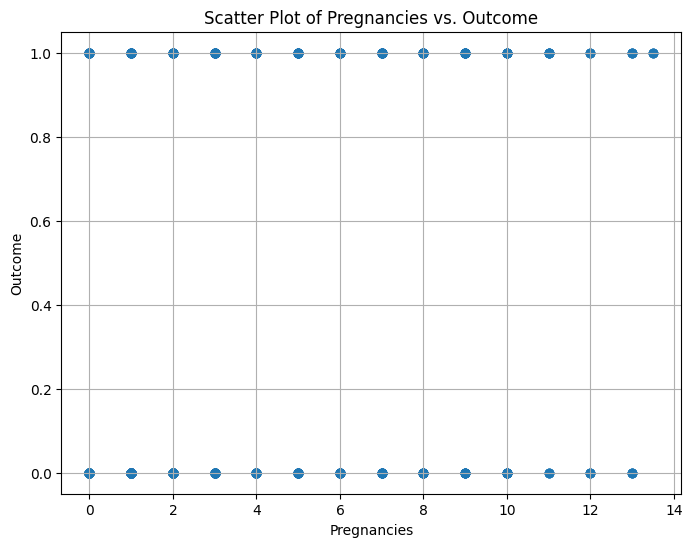

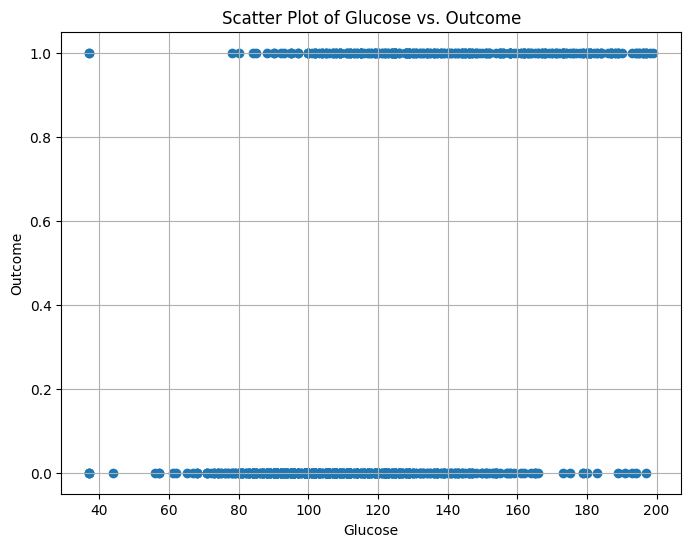

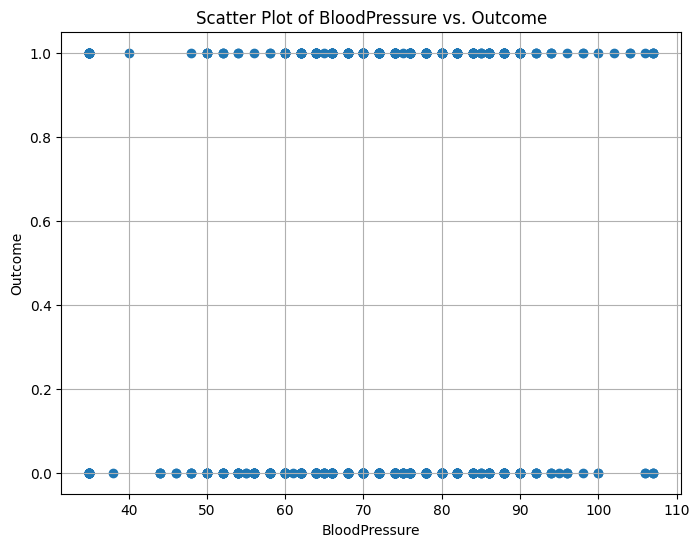

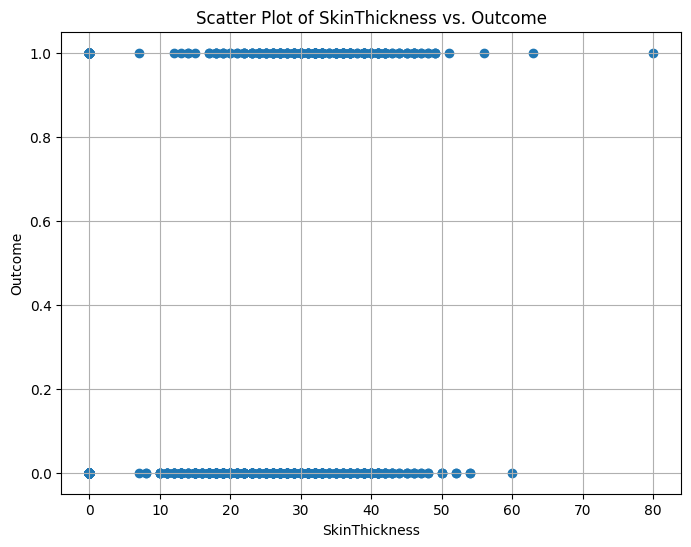

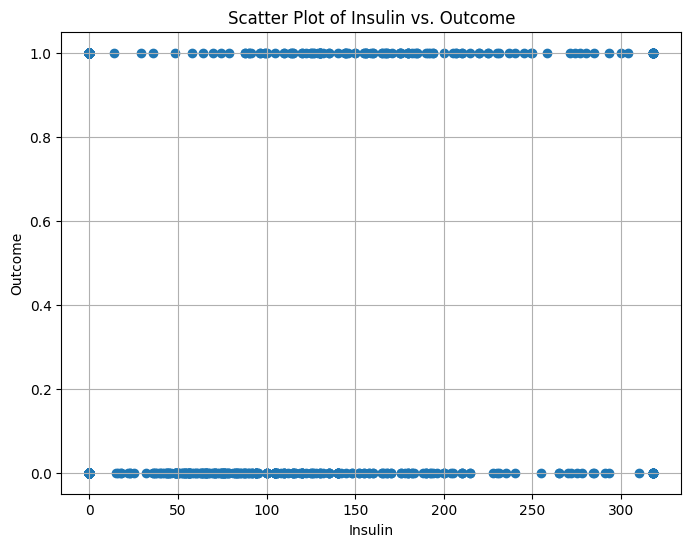

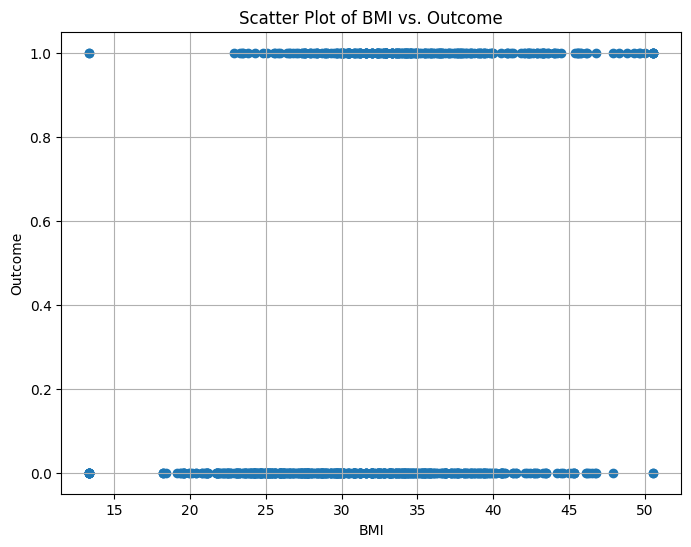

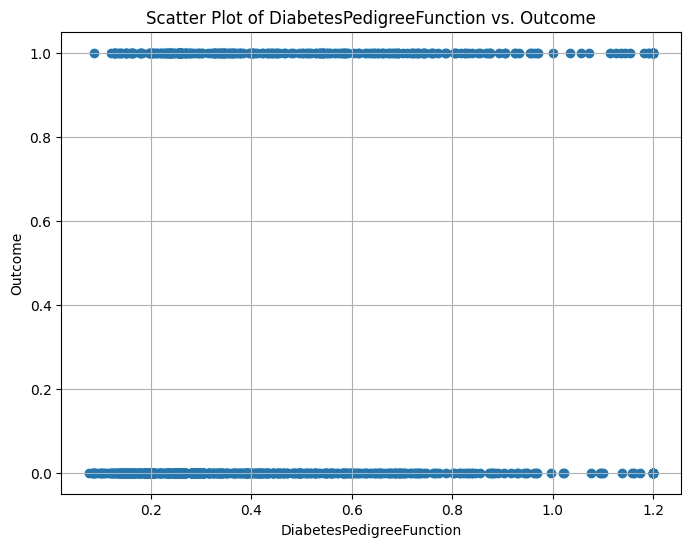

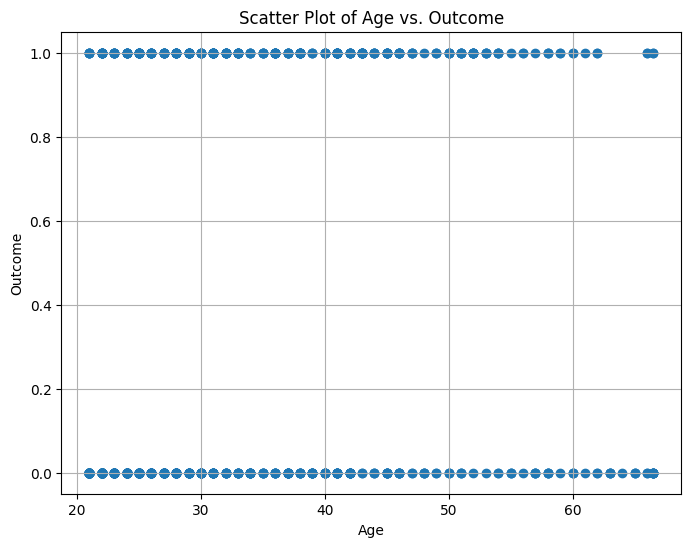

In [ ]:

for column in df.columns:
  if column != 'Outcome':  
    plt.figure(figsize=(8, 6))  
    plt.scatter(df[column], df['Outcome'])
    plt.title(f'Scatter Plot of {column} vs. Outcome')
    plt.xlabel(column)
    plt.ylabel('Outcome')
    plt.grid(True)
    plt.show()

Pregnancies                 0.220392
Glucose                     0.479158
BloodPressure               0.113301
SkinThickness               0.073125
Insulin                     0.124721
BMI                         0.309739
DiabetesPedigreeFunction    0.184969
Age                         0.242702
Outcome                     1.000000
Name: Outcome, dtype: float64


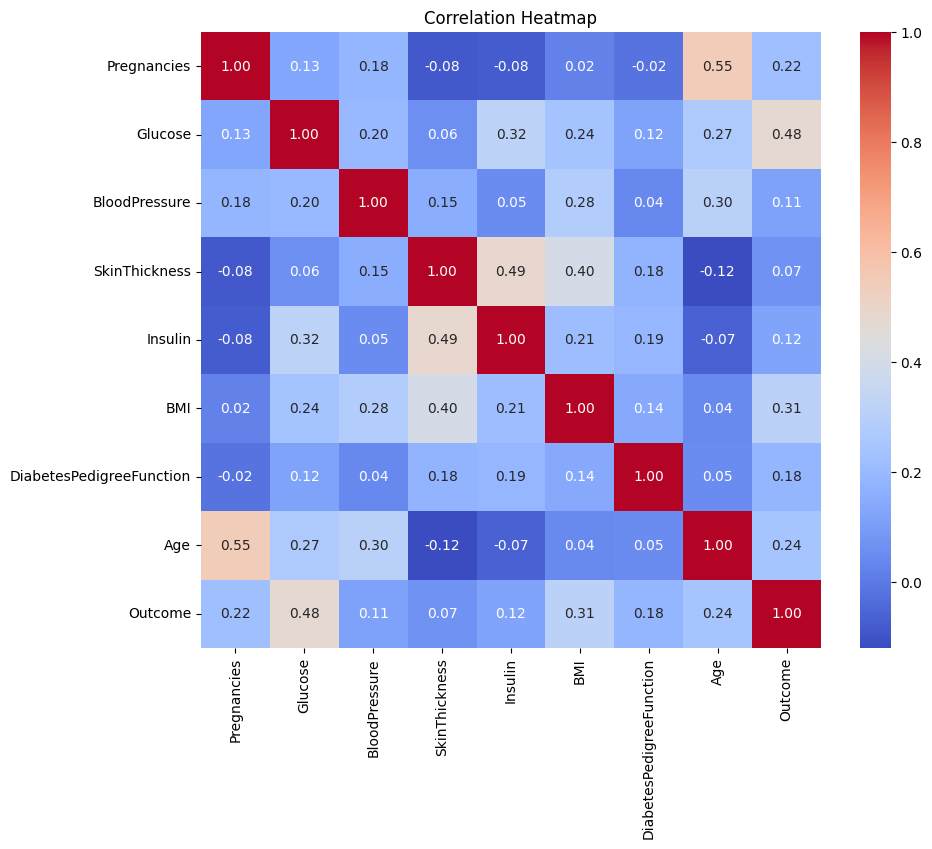

In [40]:

import seaborn as sns
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation with 'Outcome'
print(correlation_matrix['Outcome'])

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Splitting

In [41]:

from sklearn.model_selection import train_test_split


# Define features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size as needed

# Now you have X_train, X_test, y_train, and y_test
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)


# Scaling

In [42]:


from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now X_train_scaled and X_test_scaled contain the scaled features
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train_scaled shape: (614, 8)
X_test_scaled shape: (154, 8)


# Training

In [43]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    print("-" * 20)

--- Logistic Regression ---
Accuracy: 0.7597402597402597
              precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154

--------------------
--- K-Nearest Neighbors ---
Accuracy: 0.7077922077922078
              precision    recall  f1-score   support

           0       0.75      0.81      0.78        99
           1       0.60      0.53      0.56        55

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.70      0.71      0.70       154

--------------------
--- Support Vector Machine ---
Accuracy: 0.7337662337662337
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        99
           1       0.

# Hyperparameter Tuning

In [44]:

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Penalty type
    'solver': ['liblinear', 'saga']  # Solver algorithm
}

# Create a Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_logreg = grid_search.best_estimator_
y_pred = best_logreg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy of best model: {accuracy}")
print(classification_report(y_test, y_pred))

Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.7687724910035986
Test Accuracy of best model: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



# Predicting input

In [46]:
def predict_diabetes(input_data, model):
  input_data_as_numpy_array = np.asarray(input_data)
  input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
  input_data_scaled = scaler.transform(input_data_reshaped)  
  prediction = model.predict(input_data_scaled)
  print(prediction)
  if (prediction[0] == 0):
    print("The Person does not have Diabetes")
  else:
    print("The Person has Diabetes")
input_data = [6, 148, 72, 35, 0, 33.6, 0.627, 50]  
predict_diabetes(input_data, best_logreg)

[1]
The Person has Diabetes


# Pickle File

In [27]:
import pickle

filename = 'diabetes_model.sav'
pickle.dump(best_logreg, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))